sources:
- [paper implements Stereo Correspondence](https://www.researchgate.net/publication/251949538_Sum_of_Absolute_Differences_algorithm_in_stereo_correspondence_problem_for_stereo_matching_in_computer_vision_application)
- [stereoBM docs](https://docs.opencv.org/3.2.0/d9/dba/classcv_1_1StereoBM.html#details)
- 


In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import cv2
from os import path
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# captured img is in remote
jetson_ip = '192.168.100.13'
stereo_img_dir = '\\\\{}\\sambashare\\calibration_img'.format(jetson_ip)
left_img_names = os.listdir(os.path.join(stereo_img_dir, 'left'))
right_img_names = os.listdir(path.join(stereo_img_dir, 'right'))
left_img_filepath = [os.path.join(stereo_img_dir, 'left', name) for name in left_img_names]
right_img_filepath = [os.path.join(stereo_img_dir, 'right', name) for name in right_img_names]

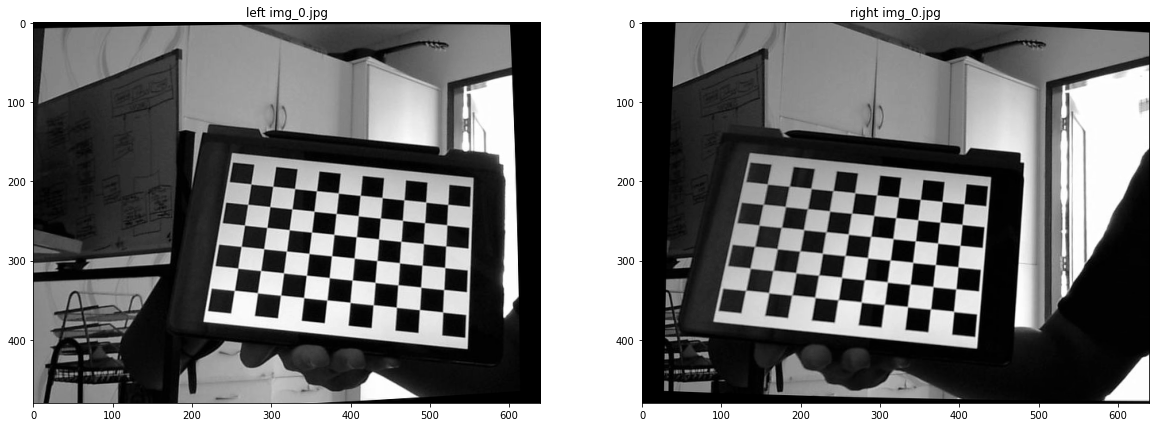

In [3]:
# Load image
left_name = left_img_names[0].split('\\')[-1]
right_name = right_img_filepath[0].split('\\')[-1]

left_img_0 = cv2.imread(left_img_filepath[0])
right_img_0 = cv2.imread(right_img_filepath[0])

left_gray = cv2.cvtColor(left_img_0, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img_0, cv2.COLOR_BGR2GRAY)

# undistored and rectivy
import calibration
preset_path = '\\\\{}\\sambashare\\calibration_preset'.format(jetson_ip)
left_gray, right_gray = calibration.calibrate_imgs(left_gray, right_gray, preset_path)


plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.imshow(left_gray, 'gray')
plt.title('left ' + left_name)

plt.subplot(1,2,2)
plt.imshow(right_gray, 'gray')
plt.title('right ' + left_name)

plt.show()


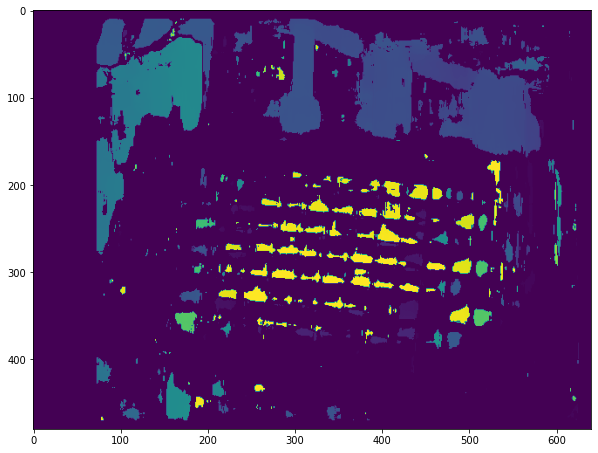

In [4]:
stereo = cv2.StereoBM_create()
disparity = stereo.compute(left_gray, right_gray)
plt.figure(figsize=(10,10))
plt.imshow(disparity)

## StereoBM parameter benchmark

7.91 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.75 ms ± 620 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.72 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.2 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.3 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
12.8 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.7 ms ± 3.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.1 ms ± 2.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
26.3 ms ± 4.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
27.8 ms ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


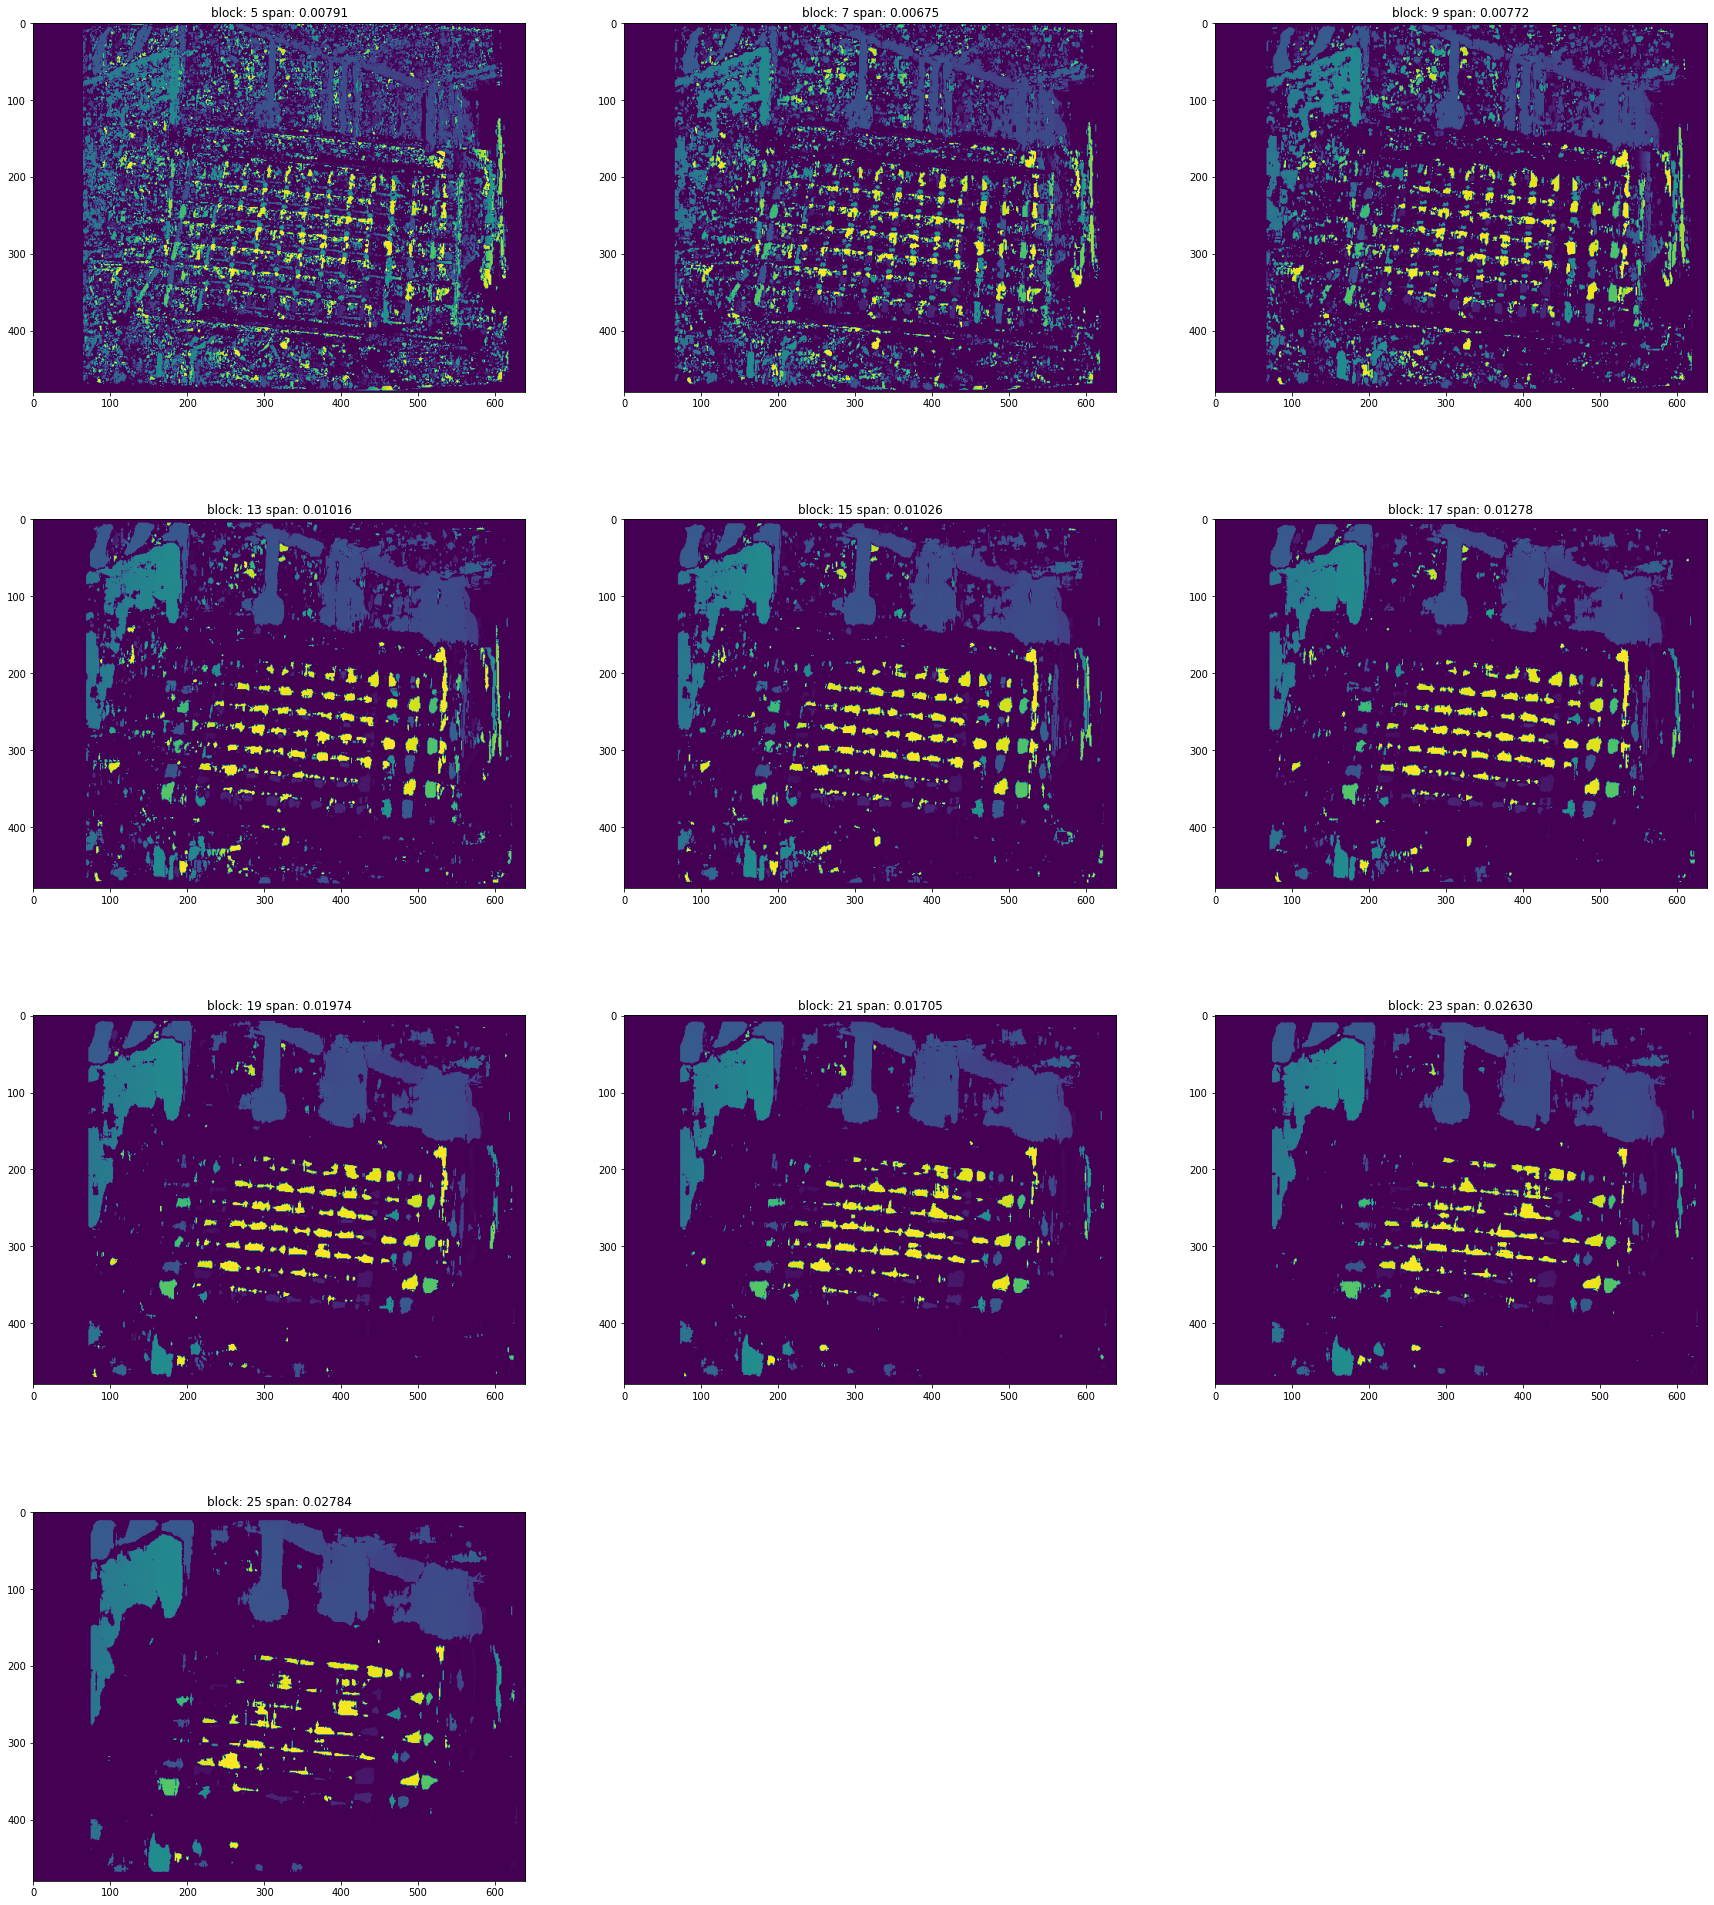

In [6]:
import time
img_list = []
time_list = []

# odd 5..255
block_num = [5, 7, 9, 13, 15, 17, 19, 21, 23, 25]

for block_n in block_num:
  stereo = cv2.StereoBM_create(blockSize=block_n)
  time_span = %timeit -o -n 10 stereo.compute(left_gray, right_gray)
  disparity = stereo.compute(left_gray, right_gray)
  img_list.append(disparity)
  time_list.append(time_span)

index = 1
plt.figure(figsize=(30, 35))
for img, span, blok_n in zip(img_list, time_list, block_num):
  plt.subplot(4,3,index)
  plt.imshow(img)
  title = 'block: {} span: {:0.5f}'.format(blok_n, span.average)
  plt.title('{}'.format(title))
  index += 1

plt.show()


